In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import tifffile as tif
from os import listdir
from os.path import isfile, join
from pathlib import Path
from cellpose import io, models

In [3]:
BASE_PATH = "/bigdata/casus/MLID/maria/VIRVS_data/VACV/raw"
TIMEPOINTS = [100, 108, 115]

In [4]:
def read_tiff(path: str) -> np.ndarray:
    im_stack = tif.imread(path)
    if len(im_stack.shape) == 4:
        im_stack = im_stack[:, 0]

    return im_stack

def get_percentiles(x):
    mi = np.percentile(x, 3, axis=None)
    ma = np.percentile(x, 99.8, axis=None)
    return mi, ma

def center_crop(x: np.ndarray, crop_size_y, crop_size_x) -> np.ndarray:
    x_center = x.shape[1] // 2
    y_center = x.shape[0] // 2
    return x[
        y_center - crop_size_y // 2 : y_center + crop_size_y // 2,
        x_center - crop_size_x // 2 : x_center + crop_size_x // 2,
    ]

def read_data(channel):

    paths_w1_t1 = list(Path(BASE_PATH).glob(f"**/w{channel}_t{TIMEPOINTS[0]}.tif"))
    n_sequences = len(paths_w1_t1)

    paths = np.empty((n_sequences, len(TIMEPOINTS)), dtype=object)
    for tdx in tqdm(TIMEPOINTS):
        for idx in tqdm(range(n_sequences)):
            w1_path_t1 = str(paths_w1_t1[idx])
            w1_path = w1_path_t1.replace(f"_t{TIMEPOINTS[0]}", f"_t{tdx}")
            paths[idx, TIMEPOINTS.index(tdx)] = w1_path
    paths = paths.flatten()
    data = []
    for path in tqdm(paths):
        sample = center_crop(np.expand_dims(tif.imread(path), -1) / 65535.0, 5948, 6048)
        data.append(sample)
    data = np.array(data, dtype=np.float32)
    return data

def hist(imgs):
    imgs = (imgs*255).astype(np.uint8)
    unique, counts = np.unique(imgs, return_counts=True)
    all_counts = np.zeros(np.max(unique)+1)
    all_counts[unique] = counts
    
    plt.figure(figsize=(12,12))
    plt.stairs(all_counts)
    plt.yscale('log')
    plt.xlim(0, np.max(unique)+1)

In [4]:
data = read_data(2)
get_percentiles(data)

100%|██████████| 32/32 [00:00<00:00, 101603.12it/s]

100%|██████████| 32/32 [00:00<00:00, 103244.41it/s]

100%|██████████| 96/96 [00:23<00:00,  4.14it/s]


(0.006713969632983208, 1.0)

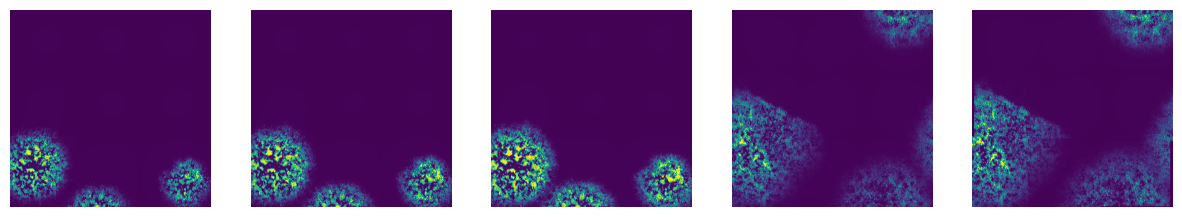

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(data[i])
    axes[i].axis('off')  

plt.show()

100%|██████████| 32/32 [00:00<00:00, 108678.32it/s]

100%|██████████| 32/32 [00:00<00:00, 104044.75it/s]

100%|██████████| 96/96 [00:21<00:00,  4.39it/s]


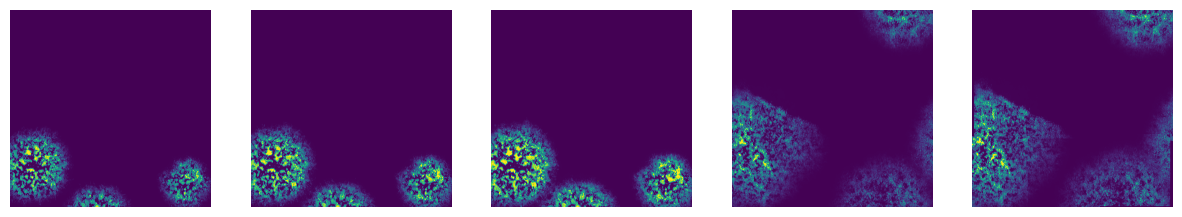

In [4]:
data = read_data(2)
min_p=0.0067
max_p=1

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    d = (data[i] - min_p) / (max_p - min_p)
    d = np.clip(d, 0, 1)
    axes[i].imshow(d)
    axes[i].axis('off')  

plt.show()

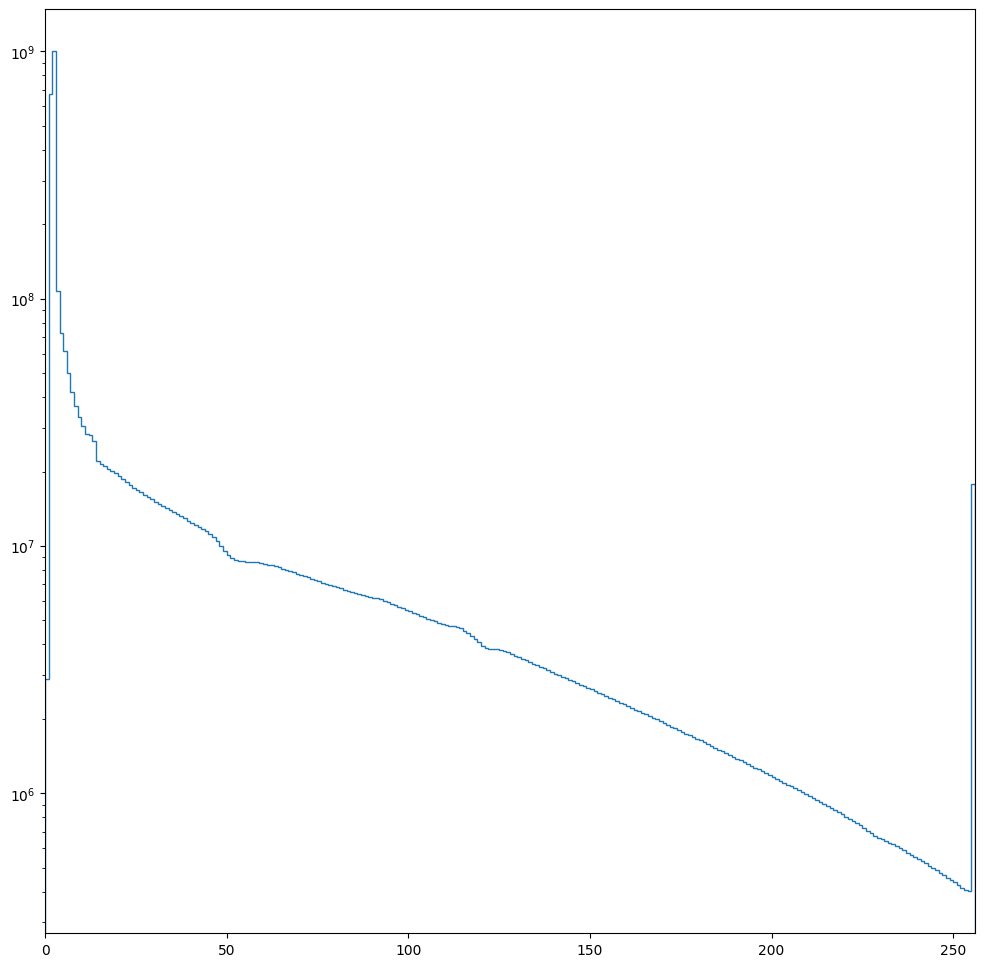

In [5]:
hist(data)

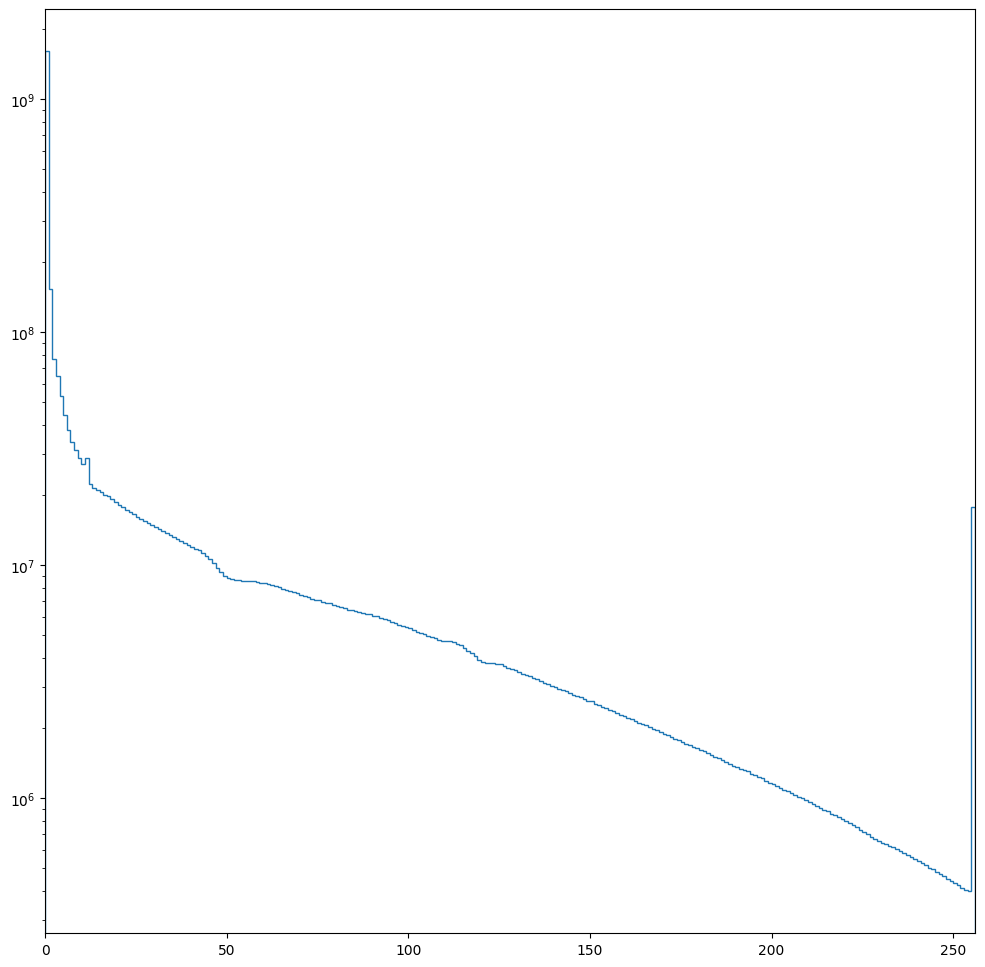

In [6]:
data_norm = (data - min_p) / (max_p - min_p)
data_norm = np.clip(data_norm, 0, 1)
hist(data_norm)

In [4]:
data = read_data(3)
get_percentiles(data)

100%|██████████| 32/32 [00:00<00:00, 180400.17it/s]

100%|██████████| 32/32 [00:00<00:00, 92820.01it/s]

100%|██████████| 96/96 [00:19<00:00,  4.83it/s]


(0.495567262172699, 1.0)

In [5]:
data = read_data(3)

100%|██████████| 32/32 [00:00<00:00, 249475.33it/s]

100%|██████████| 32/32 [00:00<00:00, 120482.70it/s]

100%|██████████| 96/96 [00:22<00:00,  4.28it/s]


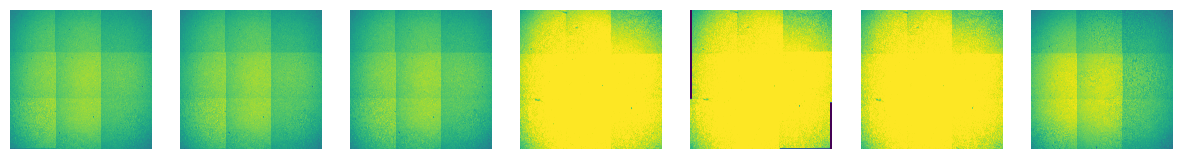

In [12]:
fig, axes = plt.subplots(1, 7, figsize=(15, 5))
for i in range(7):
    axes[i].imshow(data[i], vmin=0, vmax=1)
    axes[i].axis('off')  

plt.show()

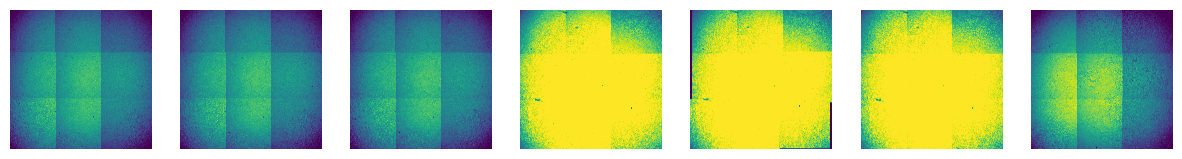

In [11]:
min_p=0.4956
max_p=1

fig, axes = plt.subplots(1, 7, figsize=(15, 5))

for i in range(7):
    d = (data[i] - min_p) / (max_p - min_p)
    d = np.clip(d, 0, 1)
    axes[i].imshow(d, vmin=0, vmax=1)
    axes[i].axis('off')  

plt.show()

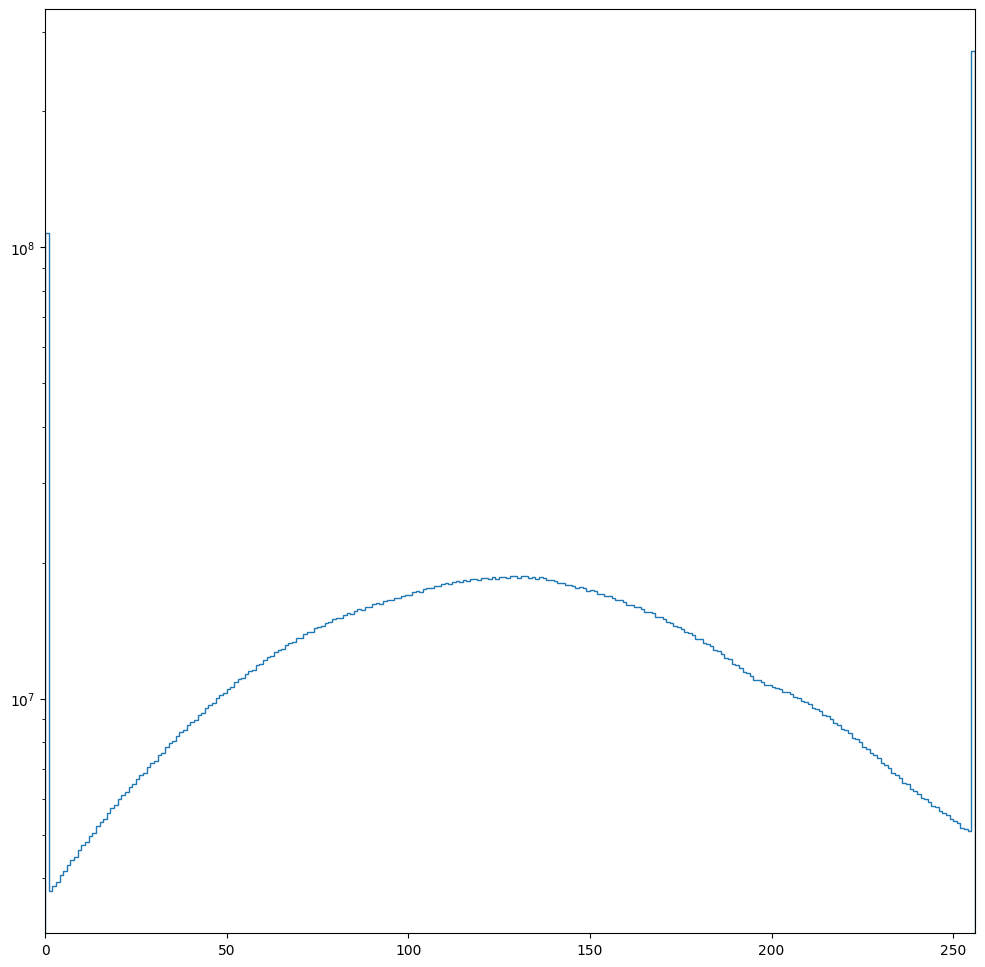

In [7]:
data_norm = (data - min_p) / (max_p - min_p)
data_norm = np.clip(data_norm, 0, 1)
hist(data_norm)

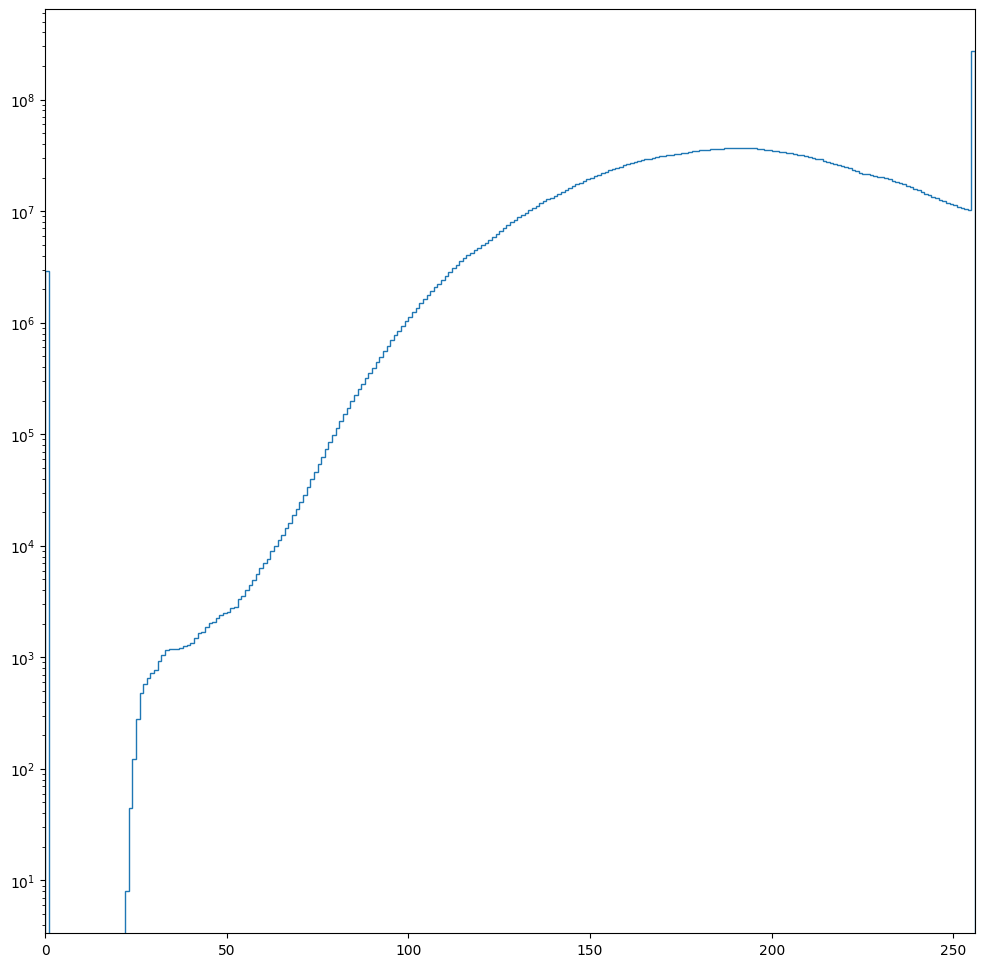

In [8]:
hist(data)